# <center> Predicting IPO Day Success  </center>

## Load library and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

## Data wrangling & EDA

In [2]:
# Load in the IPO CSV file
df_IPO_raw = pd.read_csv('ipo_2010_2021.csv')
df_IPO_raw.head()


,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,29-07-21,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79
4,07-07-21,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99


In [3]:
# Let's check some the basic statistics and data type for df_IPO_raw
print(df_IPO_raw.info())
print(df_IPO_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    264 non-null    object 
 1   IPO Name                264 non-null    object 
 2   Profile                 264 non-null    object 
 3   Issue Size (in crores)  264 non-null    float64
 4   QIB                     264 non-null    float64
 5   HNI                     264 non-null    float64
 6   RII                     264 non-null    float64
 7   Total                   264 non-null    float64
 8   Issue                   264 non-null    float64
 9   Listing Open            264 non-null    float64
 10  Listing Close           264 non-null    float64
 11  Listing Gains(%)        264 non-null    float64
 12  CMP                     264 non-null    object 
 13  Current  Gains (%)      262 non-null    float64
dtypes: float64(10), object(4)
memory usage: 29

In [4]:
# We can convert the "Date" column to a datetime format for easier manipulations
df_IPO_raw["Date"] = pd.to_datetime(df_IPO_raw["Date"])
df_IPO_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    264 non-null    datetime64[ns]
 1   IPO Name                264 non-null    object        
 2   Profile                 264 non-null    object        
 3   Issue Size (in crores)  264 non-null    float64       
 4   QIB                     264 non-null    float64       
 5   HNI                     264 non-null    float64       
 6   RII                     264 non-null    float64       
 7   Total                   264 non-null    float64       
 8   Issue                   264 non-null    float64       
 9   Listing Open            264 non-null    float64       
 10  Listing Close           264 non-null    float64       
 11  Listing Gains(%)        264 non-null    float64       
 12  CMP                     264 non-null    object    

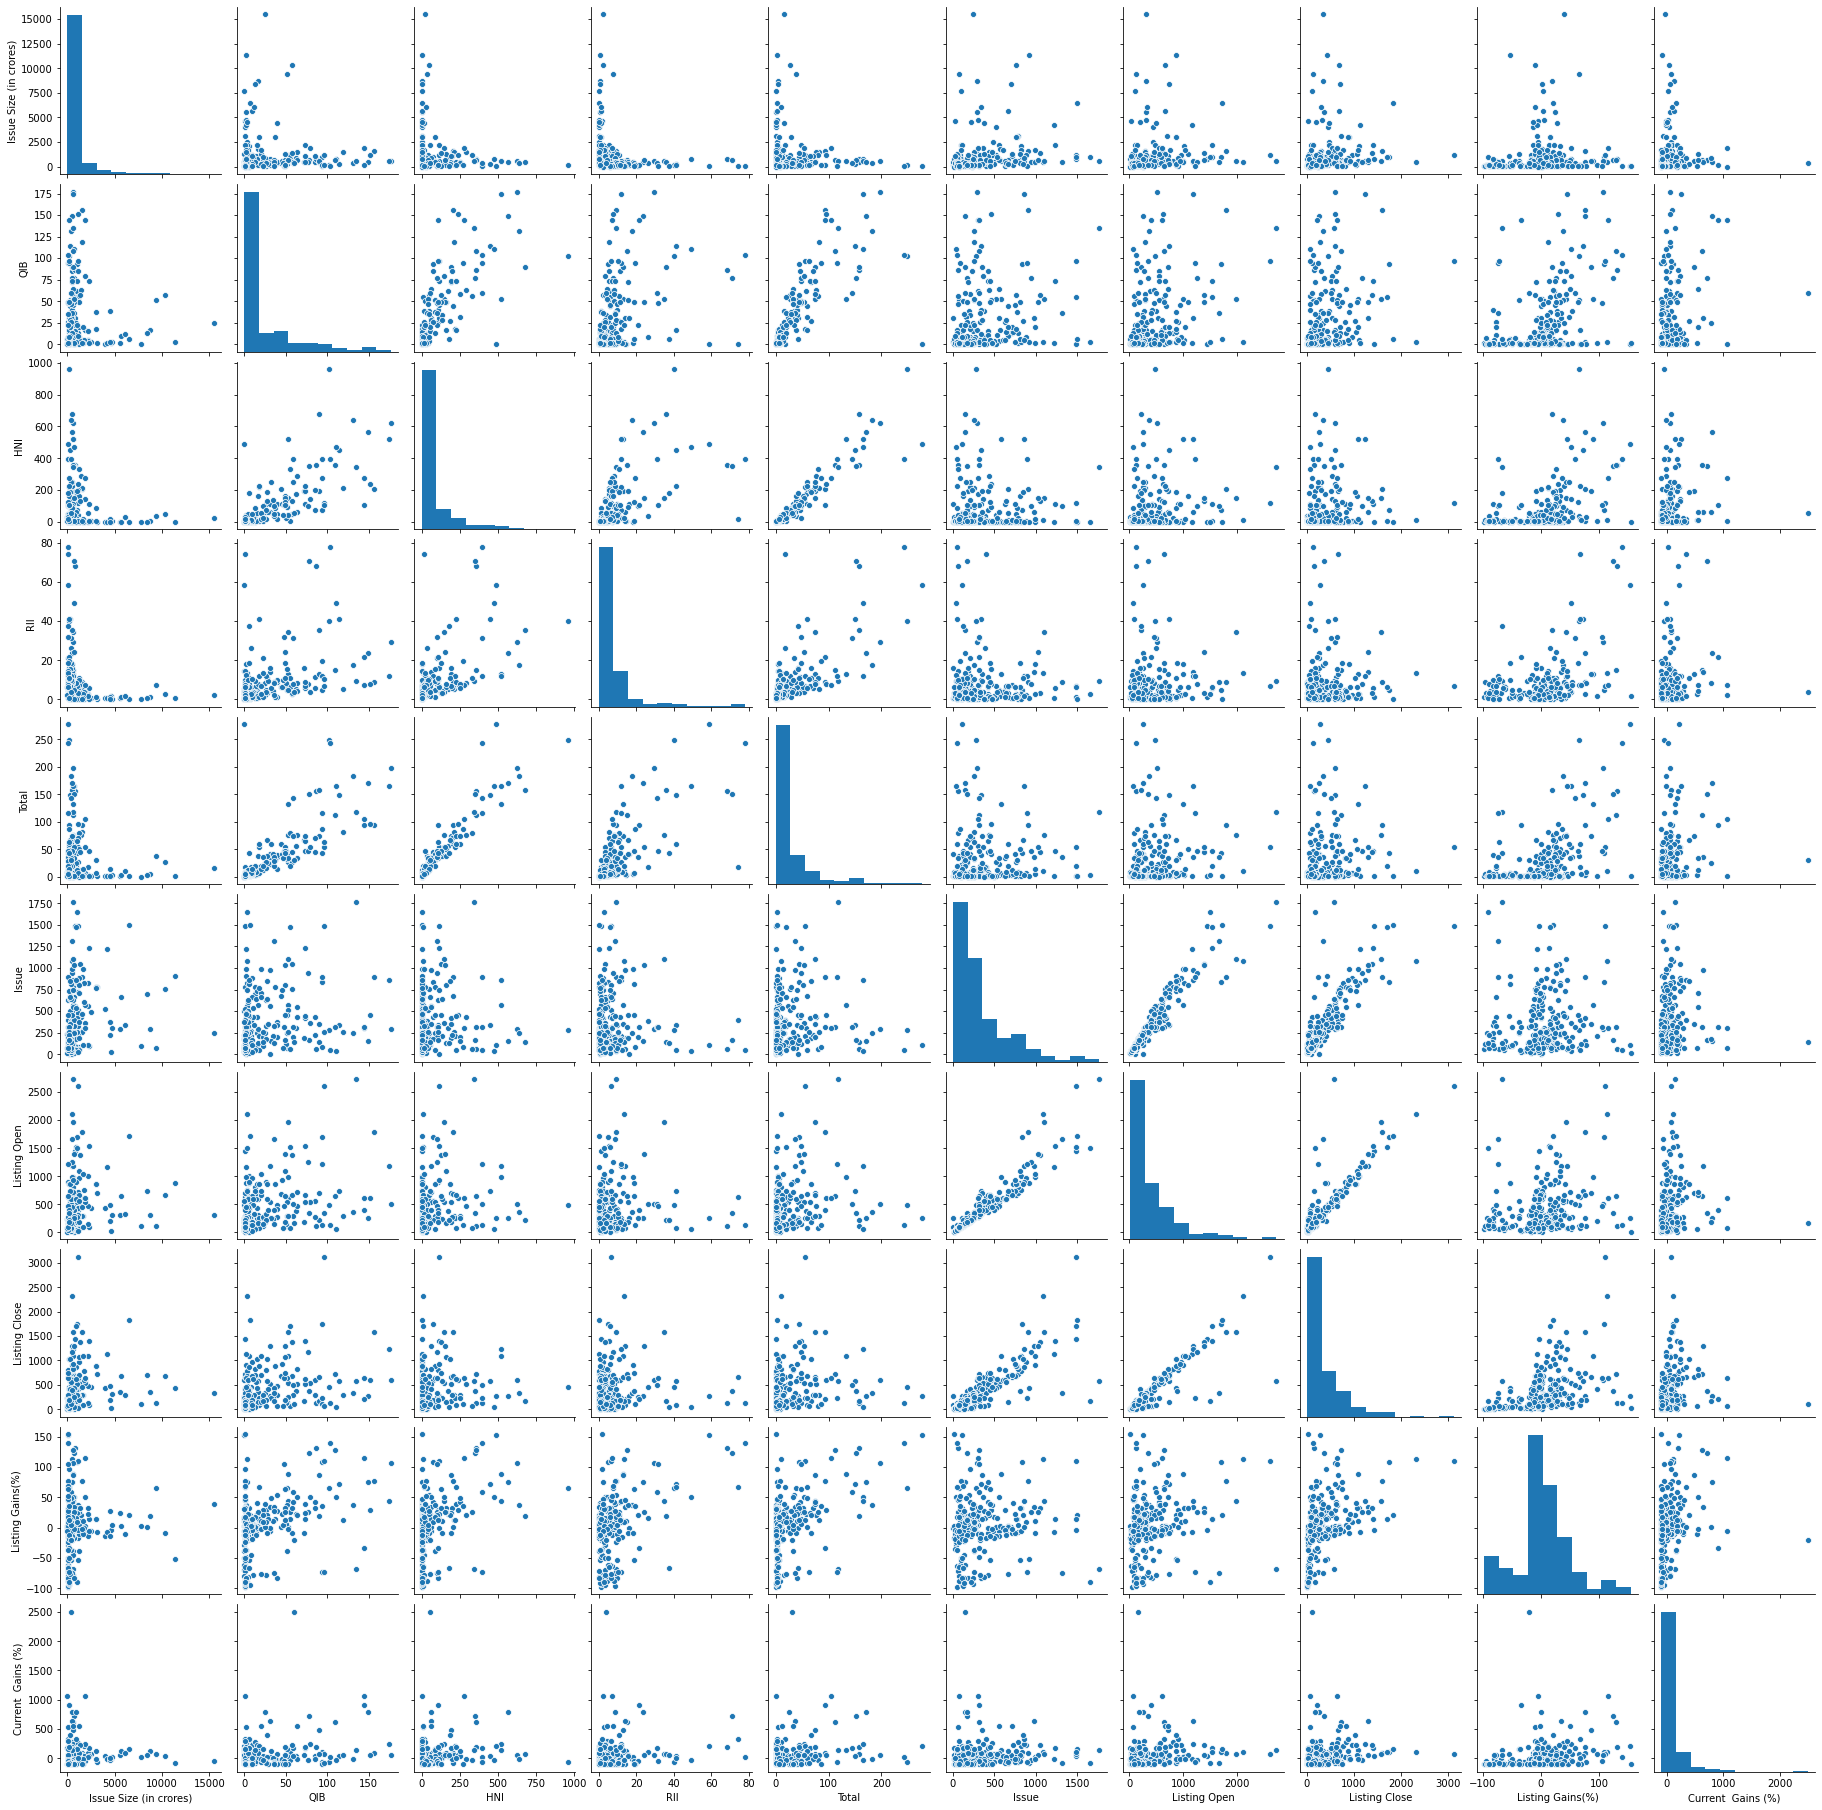

In [5]:
# Check the distribution of the features as well as some initial correlation
sns.pairplot(df_IPO_raw)

In [6]:
# Load in the market sentiment CSV file
df_market_raw = pd.read_csv('NIFTY_2010_2021.csv')
df_market_raw.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,04-Jan-2010,5200.90,5238.45,5167.10,5232.20,148652424,6531.61
1,05-Jan-2010,5277.15,5288.35,5242.40,5277.90,240844424,7969.62
2,06-Jan-2010,5278.15,5310.85,5260.05,5281.80,216147837,7892.60
3,07-Jan-2010,5281.80,5302.55,5244.75,5263.10,181246734,6890.99
4,08-Jan-2010,5264.25,5276.75,5234.70,5244.75,201910800,7777.04


In [7]:
# Let's check some the basic statistics and data type for df_IPO_raw
print(df_market_raw.info())
print(df_market_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2873 non-null   object 
 1   Open               2873 non-null   float64
 2   High               2873 non-null   float64
 3   Low                2873 non-null   float64
 4   Close              2873 non-null   float64
 5   Shares Traded      2873 non-null   int64  
 6   Turnover (Rs. Cr)  2873 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB
None
               Open          High           Low         Close  Shares Traded  \
count   2873.000000   2873.000000   2873.000000   2873.000000   2.873000e+03   
mean    8413.434963   8456.786930   8355.243126   8406.491699   2.650380e+08   
std     2768.206557   2775.776853   2751.056171   2764.130545   1.960690e+08   
min     4623.150000   4623.150000   4531.150000   4544.200000   6.555703e

In [8]:
# We can convert the "Date" column to a datetime format for easier manipulations and set it as index
df_market_raw["Date"] = pd.to_datetime(df_market_raw["Date"])
df_market_raw.set_index("Date", inplace=True)
df_market_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2873 entries, 2010-01-04 to 2021-07-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2873 non-null   float64
 1   High               2873 non-null   float64
 2   Low                2873 non-null   float64
 3   Close              2873 non-null   float64
 4   Shares Traded      2873 non-null   int64  
 5   Turnover (Rs. Cr)  2873 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 157.1 KB


We need to aggregate the market data such that we can get the 30-day and 60-day market sentiment leading up to each IPO in df_IPO_raw. We can write a function to do this

In [9]:
# function to obtain market trends leading up to an IPO
def market_trend(date, ndays):
    dt_delta = dt.timedelta(days=ndays)
    market_trades = df_market_raw[(date - dt_delta) : date]['Turnover (Rs. Cr)'].values
    mean_market_move = (sum(np.diff(market_trades))/float(29)) / np.mean(market_trades)
    return mean_market_move

In [10]:
# create new columns for 30-day and 60-day market trends
df_IPO_raw["m_trend_30"] = df_IPO_raw["Date"].apply(lambda x: market_trend(x,30))
df_IPO_raw["m_trend_60"] = df_IPO_raw["Date"].apply(lambda x: market_trend(x,60))
df_IPO_raw.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),m_trend_30,m_trend_60
0,2021-07-29,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46,0.008333,-0.004794
1,2021-07-23,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46,-0.004195,-0.015990
2,2021-07-19,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98,-0.007307,-0.013696
3,2021-07-19,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79,-0.007307,-0.013696
4,2021-07-07,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99,-0.004526,-0.011698


In [11]:
# create a new column to store whether a IPO day was successful or not using "Listing Gains(%)"
df_IPO_raw["open_day_success"] = df_IPO_raw['Listing Gains(%)'].apply (lambda x: 1 if x > 0 else 0)
df_IPO_raw.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),m_trend_30,m_trend_60,open_day_success
0,2021-07-29,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46,0.008333,-0.004794,1
1,2021-07-23,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46,-0.004195,-0.015990,1
2,2021-07-19,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98,-0.007307,-0.013696,1
3,2021-07-19,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79,-0.007307,-0.013696,1
4,2021-07-07,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99,-0.004526,-0.011698,1


With this we have all the data that we need to proceed with modeling!

## Modeling

In [13]:
!pip install keras
from tensorflow import keras

X = df_IPO_raw[["Issue Size (in crores)", "QIB", "HNI", "RII", "Total", 
                "Issue", "Listing Open", "m_trend_30", "m_trend_60"]].values
y = df_IPO_raw["open_day_success"].values
# define min max scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

# define the keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=9, activation='relu'))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=20, verbose = 0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

9/9 [==============================] - 0s 799us/step - loss: 0.4008 - accuracy: 0.8220
Accuracy: 82.20
